In [1]:
import numpy as np
import keras
import pandas as pd
from keras import layers
from matplotlib import pyplot as plt
from keras.datasets import mnist as mn

%matplotlib inline

In [3]:
# 读取训练数据和测试数据
(train_img, train_lab), (test_img, test_lab) = mn.load_data()

In [4]:
train_img.shape, train_lab.shape, test_img.shape, test_lab.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
model = keras.Sequential()
# Flatten层会把除了第一维(样本数)之外的,也就是后面的维度摊平成同一个维度里
model.add(layers.Flatten()) # (60000, 28, 28) => (60000, 28*28)
# 已经不是第一层了,所以不再需要input_dim了,会直接根据前面层的输出来设置
model.add(layers.Dense(64, activation='tanh'))
# Softmax多分类,因为一共10种数字,所以输出维度是10
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [7]:
history = model.fit(train_img, train_lab, epochs=10, batch_size=500, validation_data=(test_img, test_lab), verbose=2) # 每批500张图片

Epoch 1/10
120/120 - 1s - loss: 0.9766 - accuracy: 0.7015 - val_loss: 0.5432 - val_accuracy: 0.8463 - 828ms/epoch - 7ms/step
Epoch 2/10
120/120 - 0s - loss: 0.4689 - accuracy: 0.8627 - val_loss: 0.4037 - val_accuracy: 0.8841 - 384ms/epoch - 3ms/step
Epoch 3/10
120/120 - 0s - loss: 0.3800 - accuracy: 0.8891 - val_loss: 0.3492 - val_accuracy: 0.9023 - 314ms/epoch - 3ms/step
Epoch 4/10
120/120 - 0s - loss: 0.3430 - accuracy: 0.8982 - val_loss: 0.3239 - val_accuracy: 0.9071 - 300ms/epoch - 2ms/step
Epoch 5/10
120/120 - 0s - loss: 0.3244 - accuracy: 0.9046 - val_loss: 0.3168 - val_accuracy: 0.9058 - 407ms/epoch - 3ms/step
Epoch 6/10
120/120 - 1s - loss: 0.3107 - accuracy: 0.9078 - val_loss: 0.2940 - val_accuracy: 0.9135 - 511ms/epoch - 4ms/step
Epoch 7/10
120/120 - 0s - loss: 0.2930 - accuracy: 0.9120 - val_loss: 0.2884 - val_accuracy: 0.9129 - 405ms/epoch - 3ms/step
Epoch 8/10
120/120 - 0s - loss: 0.2871 - accuracy: 0.9156 - val_loss: 0.2880 - val_accuracy: 0.9152 - 420ms/epoch - 4ms/step


In [8]:
model.evaluate(test_img, test_lab)

313/313 [==============================] - 0s 829us/step - loss: 0.2671 - accuracy: 0.9199


[0.2671271860599518, 0.9199000000953674]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


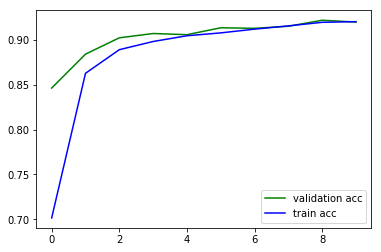

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(history.history['val_accuracy'], c='g', label='validation acc')
plt.plot(history.history['accuracy'], c='b', label='train acc')
plt.legend()
plt.show()
plt.savefig('train_acc.png')

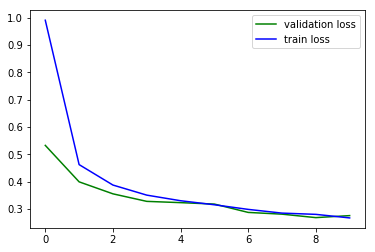

In [13]:
plt.plot(history.history['val_loss'], c='g', label='validation loss')
plt.plot(history.history['loss'], c='b', label='train loss')
plt.legend()
plt.savefig('train_loss.png')

In [13]:
result = model.predict(test_img)
def show_test(index):
    plt.imshow(test_img[index],cmap='gray')
    print("label : {}".format(test_lab[index]))
    print("predict : {}".format(result[index].argmax()))

label : 5
predict : 5


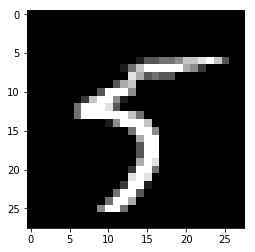

In [103]:
index = np.random.randint(1, len(test_img))
show_test(index)